# Chapter	3.	Statistical	Experiments and	Significance	Testing

En estadística tradicional, si tu quieres probar algo, osea, comprobar un hipótesis por ejemplo, tienes que diseñar y ejecutar un experimento.

### A/B Testing
La comparación de dos grupos, procesos, productos, para comprobar que B es "mejor" que A. Por lo general, A es el objeto estandár, o el producto actual, el cual es el control. La hipótesis generalmente es: "B es mejor que el control".

#### Ejemplos:
- Comparar dos 'ads' para ver cual de ellas genera más conversiones.
- Comparar dos diseños de front-end para ver cual de ellos recibe más clicks en una parte específica.
- Comparar dos tratamientos para ver cual sirve más para atacar el cáncer.
- Comparar dos precios para ver cual genera más utilidades.

#### Participantes o conceptos clave en un A/B Test:
- Treatment: El objeto con el cual se va realizar la comparación, osea, un precio, una droga, el 'ad' que se desea ver cual genera más profit... Es el objeto al cual estan expuestos los sujetos.
- Treatment	group: Grupo de sujetos expuestos a un trato específico.
- Control	group: Grupo de sujetos expuestos al tratamiento estándar.
- Randomization: Proceso de asignación random a los tratamientos.
- Subjects: los objetos que van a trabajar con los tratamientos.
- Test: La métrica estadística que se usara para la inferencia final.

En ciencia de datos, A/B testing se utiliza típicamente para comparar dos diseños de páginas web, en donde se buscan comparar el número de clicks, tiempo que los subjects duran en la página, # de clicks, # de compras, # de páginas visitadas...

_**Un poco de ética en el tema:**_
En la academica y el ámbito de la medicina, si se pide permiso a los sujetos para realizar experimentos, en el mundo de los negocios y las redes sociales, casi no...
En el libro se menciona que Facebook utilizó análisis de sentimiento para clasificar los posts de los usuarios como "positivos" y "negativos". A usuarios seleccionados de manera random se les mostraron posts positivos y negativos, y Facebook encontró que después de que los sujetos interactuaran con este nuevo feed, sus posts siguieron la tendencia positiva o negativa con la que habían interactuado.

### Hypothesis test
Experimento de significancia: ¿Acaso lo random tiene significancia en esta observación? ¿Acaso el hecho de que seleccione sujetos random, no afecta el hecho de que A es mejor que B?

#### Elementos base:
- Hipótesis nula:  la intención es que nuestro experimento encuentre las pruebas para rechazar esta hipótesis, para probar que esta equivocada, para probar que la diferencia entre A y B va más allá de lo random.
- Hipótesis alternativa: si mi intención es rechazar la nula, que es lo que queda? 

__Notas:__
- las dos hipótesis deben incluir a todo el universo posible de resultados
- hay experimentos "one-way" y "two-ways". El libro menciona que para ciencia de datos no es tan relevante la naturaleza de estos, pero que generalmente los softwares como R, utilizan "two-way".
    - Si quiero hacer un test en R o Python, debo saber bien que tipo de hipótesis usan... etc etc.

- __we	will	require	proof	that	the	difference	between	groups	is	more extreme	than	what	chance	might	reasonably	produce__
- __respecto a la hipótesis nula: This	involves	a	baseline assumption	that	the	treatments	are	equivalent,	and	any	difference	between	the groups	is	due	to	chance.	This	baseline	assumption	is	termed	the	null	hypothesis. Our	hope	is	then	that	we	can,	in	fact,	prove	the	null	hypothesis	wrong,	and	show that	the	outcomes	for	groups	A	and	B	are	more	different	than	what	chance	might produce.__



### Resampling/Resampleo
Repetidamente sacar muestras de una población para crear una muestra aleatoria, sin bias. Hay dos tipos de resampleo: Bootstrap y Permutation.

#### Bootstrap:
Se genera el muestreo con reemplazo,n veces. Esto hace que la estimación sea confiable, ya que no se sabe si la distribución de la muestra sera normal o que pedo.

#### Permutation:
Este método se usa para comprobar hipótesis. 
1. Juntas dos o más muestras y luego creas una muestra del mismo tamaño que A (por ejemplo) sin reemplazo. 
2. Haces esto para crear otra vez B y C y etc...
3. Una vez que tienes tus nuevos grupos creados, generas sus estadísticos y ahí tienes #1 permutación.

#### Ejemplo: Web Stickiness
Una empresa desea saber qué diseño web le va traer más ventas. Para poder realizar esto en un tiempo corto, se va utilizar una variable proxy, ya que el hecho de intentar con un diseño y luego con otro, va tomar mucho tiempo. Una variable proxy es aquella que te va ayudar a inferir tu variable real de interes.

En este ejemplo, la variable proxy que utilizan es el tiempo que las personas pasan en la página A y B.

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/web_page_data.csv")

In [3]:
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [18]:
df.groupby("Page").mean()

,Time
Page,
Page A,1.263333
Page B,1.620000


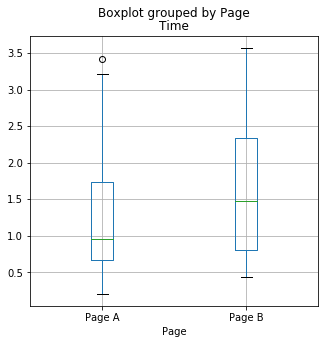

In [16]:
#Hay un total de 36 sesiones contadas: 21 para A y 15 para B.
#Usando unos boxplot podemos visualizar los tiempos en cada página
df.boxplot(['Time'], by='Page', figsize = (5,5));

In [29]:
#restando las medias:
(df[df.Page == 'Page B'].mean()- df[df.Page == 'Page A'].mean())*60
#La diferencia de tiempo de sesión entre B respecto a A es 21.4 segundos. 
#Podrías concluir con esto que B es significativamente mejor que A? Acaso la diferencia esta dentro de lo random? es decir,
#es estadísticamente significativo?
#Vamos a aplicar un test de permutación

Time    21.4
dtype: float64

In [ ]:
#Primero, vamos a crear una función que permita hacer la permutación:
#Unir nuestras muestras praa luego crear dos muestras con 15 y 21 valores (B y A) sin reemplazo


### Estadísticamente significativo y el P-Value/Statistical	Significance and	P-Value
Es el método utilizado por las personas que se dedican a la estadística para demostrar que la diferencia entre A y B es realmente significativa. Es decir, la diferencia que lo random puede llegar a decir entre A y B, si tendra un impacto significativo en los resultados.

In [ ]:
# reciclando la función de permutación del libro:
def perm_fun(df,n1,n2):
    n=n1+n2
    idx_b

In [147]:
#Primer paso: crear arreglos con todos los valores positivos(conversion rate true) y los negativos
#https://stackoverflow.com/questions/26873415/python-random-array-of-0s-and-1s
a = np.array([1]*382 + [0]*45945)

In [167]:
#Segundo paso: revuelve el array y toma una muestra del tamaño de A que es 23,739, y cuenta cuantos 1s hay
np.random.shuffle(a)
x=pd.DataFrame(a,columns=['col'])
x_A=x.sample(23739,replace=True)
x_A.col.value_counts()

0    23559
1      180
Name: col, dtype: int64

In [183]:
#Tercer paso y cuarto paso: guarda los demás valores para B y cuenta los 1s. Después
x_A.index
x_A.loc[1]

col    0
Name: 1, dtype: int32

In [ ]:
x2=[]
for i in range(1000):
    x = df.sample(2000)
    x = x.to_numpy()
    s = sum(x)
    avg = s/2000
    x2.append(int(avg))
x2=pd.DataFrame(x2)